# Bar plots (cat)

In [126]:
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

### functions

In [177]:
## resize categorical variable according a selected maximun size
def resize_cat_var(df:pd.DataFrame, column:str, max_size_cats:int = 5, decimals:int = 2, dropna:bool = False)->tuple:
    """
    Resize categorical variable according a selected maximun size. If the number of categories
    is bigger than the selected threshold, it is created a new category 'other' who include
    the rest of categories.
    df -- Input data.
    column -- Column to be used.
    max_size_cats -- Maximun number of categories (default, 5).
    decimals -- Maximun number of categories to consider to return frequency values in percent (default, 2).
    dropna -- Remove NaN values or consider as another category (default, False).
    """
    # argument validations
    assert column in df.columns.tolist()
    assert max_size_cats >= 2
    assert decimals >= 0
    # count categories
    temp = df[column].value_counts(normalize=True, sort=True, ascending=False,dropna=dropna)*100.
    # collect values and names
    c = temp.index.values
    v = temp.values.round(decimals=decimals)   
    # resize
    if len(v) > max_size_cats:
        v = np.append(v[:max_size_cats-1], np.sum(v[-(max_size_cats):]).round(decimals=decimals))
        c = np.append(c[:max_size_cats-1], 'others')
    # return
    return c, v
    

## plot distribution of a column
def bars(df:pd.DataFrame, column:str, ax:"matplotlib axis", max_size_cats:int = 5, dropna:bool = False)->"matplotlib axis":
    # validation
    assert column in df.columns.tolist(), f"column '{column}' is not available."
    # resize categories
    c, v = resize_cat_var(df, column, max_size_cats = max_size_cats, decimals = 2, dropna = dropna)
    # plot
    ax = sns.barplot(x=c, y=v, linewidth=4, edgecolor=".5", ax = ax, order = c, facecolor=(0, 0, 0, 0))
    ax.set_xlabel(column)
    ax.set_ylabel("%")
    # return axis
    return ax


# plot selected columns
def plot(df:pd.DataFrame, columns:"list or str", plot_function:"function", num_plots_per_row:int = 3, figsize:tuple = (5,4)):
    # if columns is only one string    
    if isinstance(columns, str):
        # figsize
        figsize = figsize
        # number of plots in rows / columns
        nrs = ncs = 1
    # if is a list
    elif isinstance(columns, list):
        # number of columns to be ploted
        ncolumns = len(columns)
        # number of plots in rows / columns
        nrs = math.ceil(ncolumns / num_plots_per_row)
        ncs = num_plots_per_row if ncolumns >= num_plots_per_row else ncolumns 
        # figsize
        figsize = (ncs*figsize[0], nrs*figsize[1])    
    else:
        raise
    # create figure and axis    
    fig, ax = plt.subplots(ncols = ncs, nrows = nrs, figsize = figsize)
    # if axis is an array
    if isinstance(ax, np.ndarray):
        # reshape
        ax = ax.ravel()
        # loop of axis
        for ii, c in enumerate(columns):
            # plot in cells
            _ = plot_function(df, c, ax[ii])
    # if axis is only one
    else:
        # plots only one
        _ = plot_function(df, columns[0] if len(columns) == 1 else columns, ax)
    # display plot
    plt.show()

### Load dataset (Titanic)

In [178]:

data = sns.load_dataset('titanic')
data.shape

(891, 15)

# Plot

In [179]:
# collect categorical variable names
cols_cat = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist() 
# collect data
df = data[cols_cat].copy()

### bar plot of one categorical variable

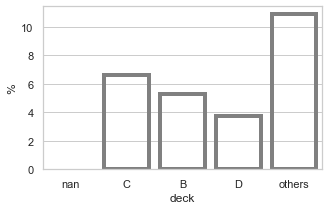

In [175]:
col = cols_cat[5]
_, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (5, 3))
bars(data, col, ax, max_size_cats=5, dropna=False)
plt.show()

### bar plots of a multiple categorical variables

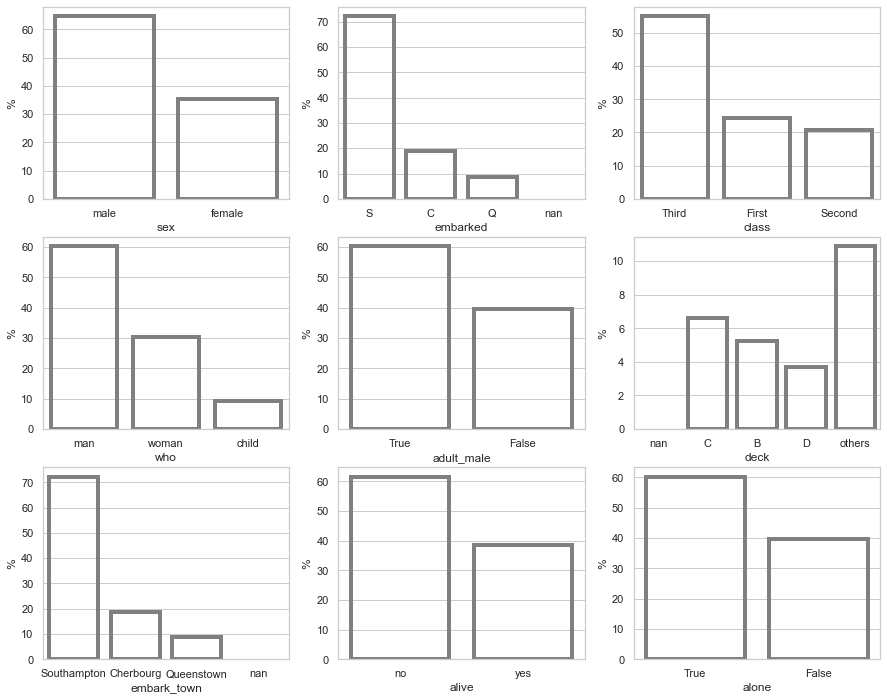

In [176]:
plot(df, cols_cat, bars, num_plots_per_row = 3, figsize=(5,4))